In [356]:
import yfinance as yf
import pandas as pd
import pandas_datareader as web
import math
import numpy as np
import matplotlib.pyplot as plt

In [357]:
# Download Apple stock information
df = web.DataReader('AAPL', data_source='yahoo', start='2011-01-01', end='2021-12-15')

In [358]:
#Observe Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.091494
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.144160
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.227140
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.218872
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.292053
...,...,...,...,...,...,...
2021-12-09,176.750000,173.919998,174.910004,174.559998,108923700.0,174.559998
2021-12-10,179.630005,174.690002,175.210007,179.449997,115228100.0,179.449997
2021-12-13,182.130005,175.529999,181.119995,175.740005,153237000.0,175.740005


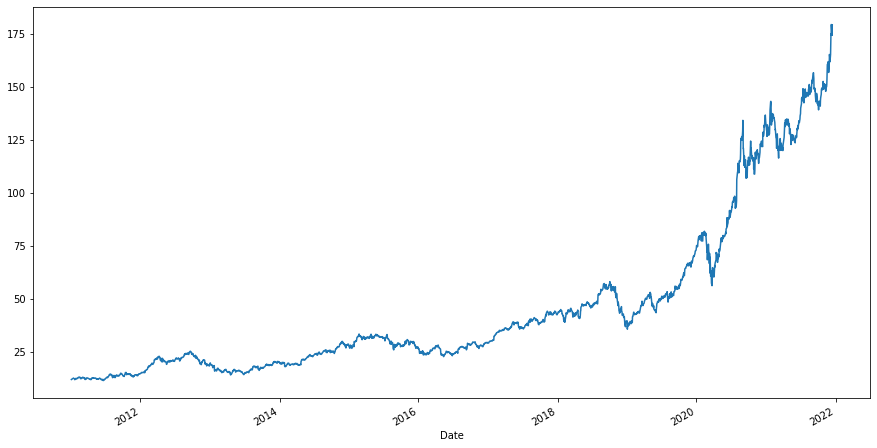

In [359]:
# Plot Closing Price
df['Close'].plot(figsize=(15,8));

There is a clear trend. If I were to split this data into train and test the train set will take on different values from the test set as the time series is increasing over time. Below I test how different machine learning models perform on data outside the range of values they were trained on.

# Extrapolation

In [360]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [361]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) #y = cos(2x_1)+ cos(3x_2)

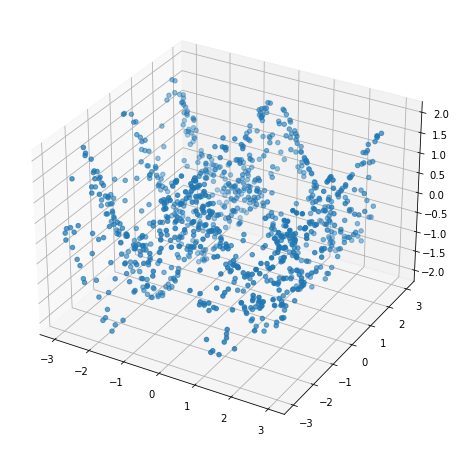

In [362]:
# Plot dataset
# Plot it
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

### Support Vector Machines (SVM)

In [363]:
# SVR
model = SVR(C=100.)
model.fit(X, Y);

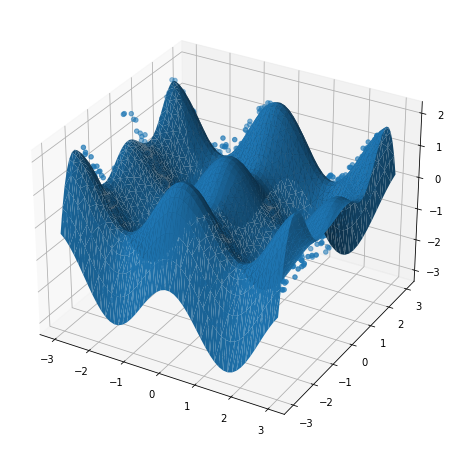

In [364]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

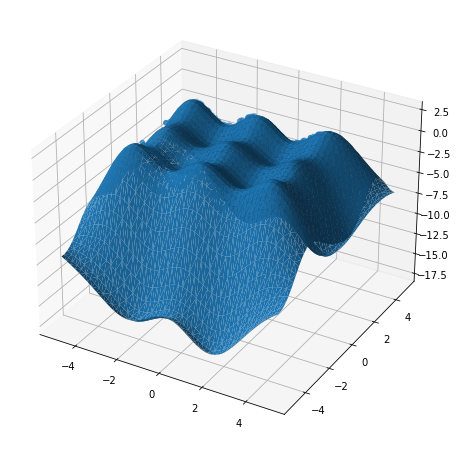

In [365]:
# Test Extrapolation by letting values go from (-5,5), compared to previous (-3,3)
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

It seems SVM has extrapolated poorly with values outside the range of training set. Check true function to confirm

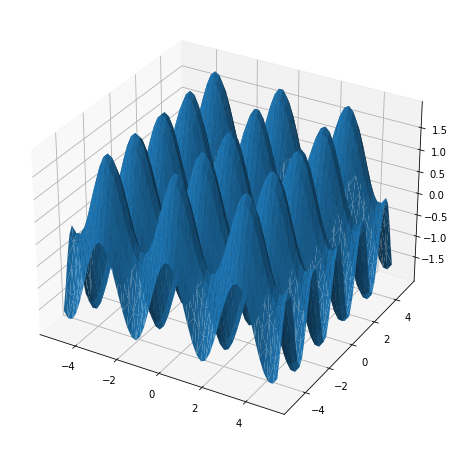

In [366]:
# Plot True function
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1]) ### the true function y = cos(2x_1)+ cos(3x_2)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth=0.2, antialiased=True)
plt.show()

### Random Forest

In [367]:
model = RandomForestRegressor()
model.fit(X, Y);

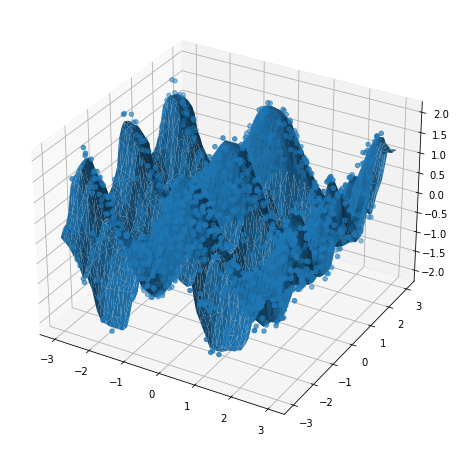

In [368]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

Random forests predicitons not as smooth

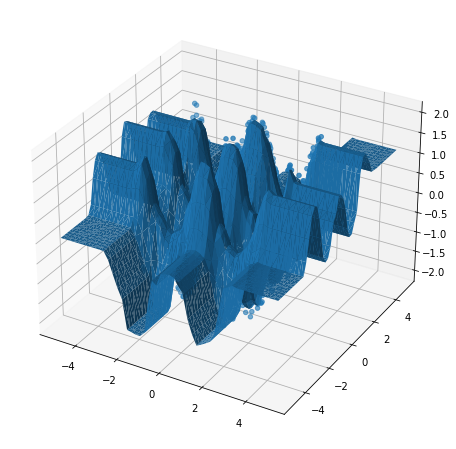

In [369]:
# Test Random Forest extrapolation
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Extrapolated poorly. Projects last know prediction outward, as the tree cannot split beyond training values

### Neural Network (Multi Layer Perceptron)

In [370]:
model = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)
model.fit(X, Y);

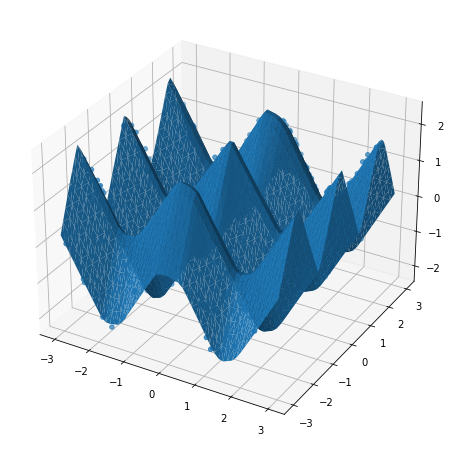

In [371]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

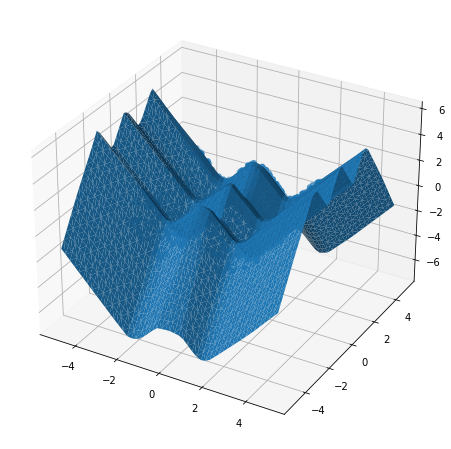

In [372]:
# Test extrapolation?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Again inaccurate. Predictions extended in a straight line

### Extrapolation applied to stock prices

In [373]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.091494
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.144160
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.227140
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.218872
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.292053
...,...,...,...,...,...,...
2021-12-09,176.750000,173.919998,174.910004,174.559998,108923700.0,174.559998
2021-12-10,179.630005,174.690002,175.210007,179.449997,115228100.0,179.449997
2021-12-13,182.130005,175.529999,181.119995,175.740005,153237000.0,175.740005


In [374]:
# Split data into train and test
train = df.iloc[:2500]['Close'].to_numpy()
test = df.iloc[2500:]['Close'].to_numpy()

In [375]:
# Create autoregressive model with two lags # y(t)=f(y(t-1)), y(t-2))
Xtrain = []
for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t + 1]
  Xtrain.append((x0, x1))

Xtest = []
for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t + 1]
  Xtest.append((x0, x1))

In [376]:
# Convert to numpy arrays
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

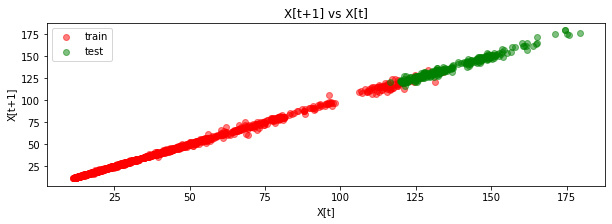

In [377]:
plt.figure(figsize=(10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(Xtrain[:,0], Xtrain[:,1], c='r', alpha=0.5, label='train')
plt.scatter(Xtest[:,0], Xtest[:,1], c='g', alpha=0.5, label='test')
plt.legend();

As shown, running a machine learning model on stock prices rather than returns would mean that the test set would require extrapolation as the model only gets to train on the red range of values and does not observe the green range. This also applies to Min-Max Scaling

# ML Regression

In [378]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [379]:
# Compute log close prices of stock
df['LogClose'] = np.log(df['Close'])

In [380]:
# Take the difference 
df['DiffLogClose'] = df['LogClose'].diff()

In [381]:
# Train test split
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [382]:
#Create supervised dataset
# Use T past values to predict the next value
# Make supervised dataset
# let's see if we can use T past values to predict the next value

series = df['DiffLogClose'].to_numpy()[1:]

T = 21
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2736, 21) Y.shape (2736,)


In [383]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [384]:
# Fit Linear Model
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
lr.score(Xtrain, Ytrain)

0.026342307094991413

In [385]:
lr.score(Xtest, Ytest)

-0.26637096978973074

Train nearly zero, while test less than zero

In [386]:
# Boolean index
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

train_idx[:T+1] = False # first T+1 values are not predictable

In [387]:
# Needed to compute un-differenced predictions
df['ShiftLogClose'] = df['LogClose'].shift(1)
prev = df['ShiftLogClose']

In [388]:
# Last-known train value
last_train = train.iloc[-1]['LogClose']

In [389]:
# 1-step forecast
df.loc[train_idx, 'LR_1step_train'] = prev[train_idx] + lr.predict(Xtrain)
df.loc[test_idx, 'LR_1step_test'] = prev[test_idx] + lr.predict(Xtest)

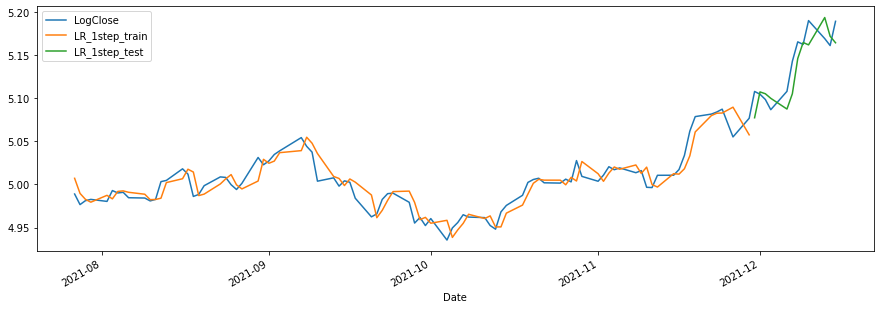

In [390]:
# plot 1-step forecast
cols = ['LogClose', 'LR_1step_train', 'LR_1step_test']
df.iloc[-100:][cols].plot(figsize=(15, 5));

Simply lags input time series

### Multi - Step Forecast

In [391]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = lr.predict(last_x.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [392]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'LR_multistep'] = last_train + np.cumsum(multistep_predictions)

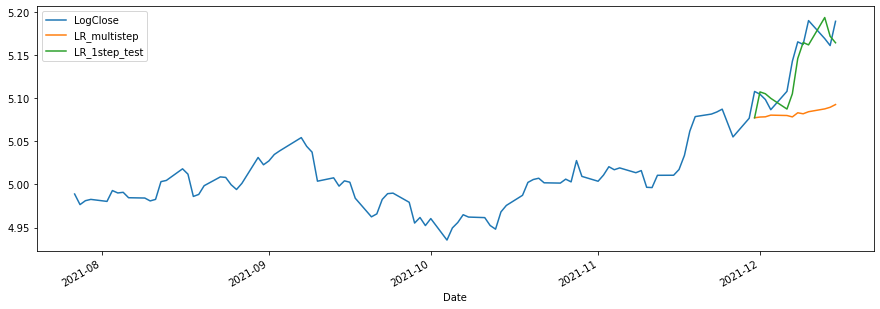

In [393]:
# plot 1-step and multi-step forecast
cols = ['LogClose', 'LR_multistep', 'LR_1step_test']
df.iloc[-100:][cols].plot(figsize=(15, 5));

multi step almost follows a straight line

In [394]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2725, 21) Y.shape (2725, 12)


In [395]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [396]:
lr = LinearRegression()
lr.fit(Xtrain_m, Ytrain_m)
lr.score(Xtrain_m, Ytrain_m)

0.022494715689861295

In [397]:
r2_score(lr.predict(Xtest_m).flatten(), Ytest_m.flatten())

-120.74381898767214

In [398]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'LR_multioutput'] = last_train + \
  np.cumsum(lr.predict(Xtest_m).flatten())

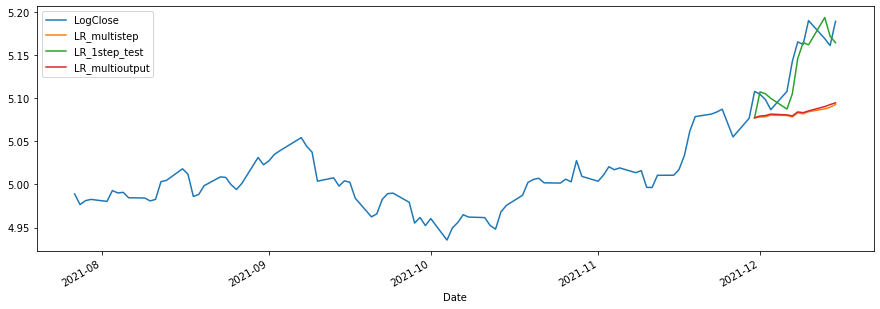

In [399]:
# plot all forecasts
cols = ['LogClose', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df.iloc[-100:][cols].plot(figsize=(15, 5));

In [400]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose']
mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'LR_multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'LR_multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.011200954553243483
multi-output MAPE: 0.010932074094136976


# Testing other (non - linear) models 

## SVR

In [401]:
def one_step_and_multistep_forecast(model, name):
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  # print("Train R^2:", model.score(Xtrain, Ytrain))
  # print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  # store 1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = \
    prev[train_idx] + model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = \
    prev[test_idx] + model.predict(Xtest)

  # generate multi-step forecast
  multistep_predictions = []

  # first test input
  last_x = Xtest[0]

  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  # store multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = \
    last_train + np.cumsum(multistep_predictions)

  # MAPE of multi-step forecast
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multistep_test'])
  print("Test MAPE (multi-step):", mape)

  # plot 1-step and multi-step forecast
  cols = [
    'LogClose',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df.iloc[-100:][cols].plot(figsize=(15, 5));

One-step forecast: SVR
Test MAPE (multi-step): 0.02671561853692007


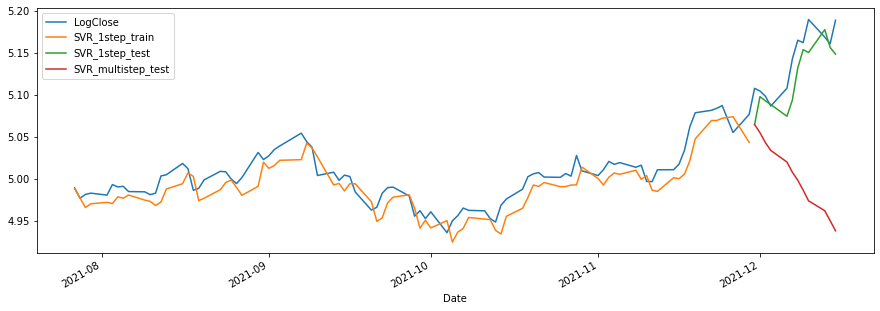

In [402]:
one_step_and_multistep_forecast(SVR(), "SVR")

## Random Forests

One-step forecast: RF
Test MAPE (multi-step): 0.010167614388197658


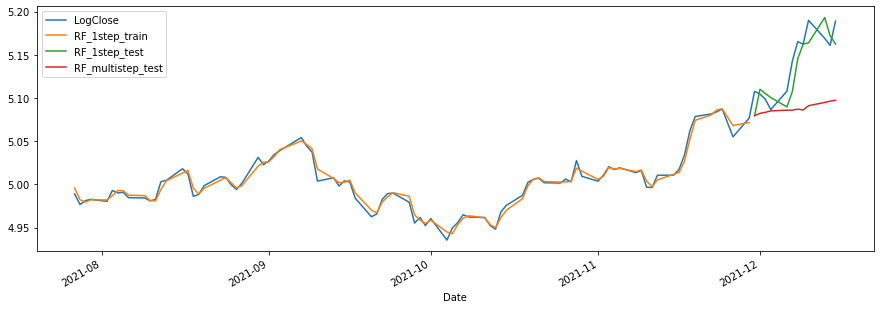

In [403]:
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")

In [404]:
def multi_output_forecast(model, name):
  model.fit(Xtrain_m, Ytrain_m)
  
  # save multi-output forecast to dataframe
  df.loc[test_idx, f'{name}_multioutput'] = \
    last_train + np.cumsum(model.predict(Xtest_m).flatten())
  
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  # plot all forecasts
  # assume that previous functions have been run
  cols = [
    'LogClose',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df.iloc[-100:][cols].plot(figsize=(15, 5));

Test MAPE (multi-output): 0.01031356870879896


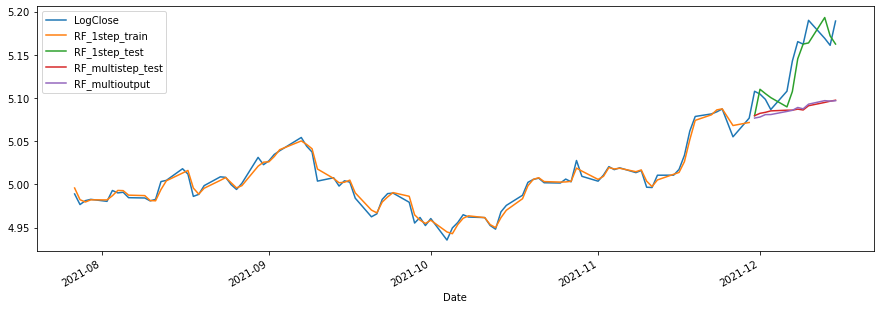

In [405]:
multi_output_forecast(RandomForestRegressor(), "RF")

# Predicting Stock Movement rather than Price/Return (Classification)

In [406]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [407]:
# Download Apple stock information
df = web.DataReader('AAPL', data_source='yahoo', start='2011-01-01', end='2021-12-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.091495
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.144159
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.227143
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.218876
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.292054
...,...,...,...,...,...,...
2021-12-09,176.750000,173.919998,174.910004,174.559998,108923700.0,174.559998
2021-12-10,179.630005,174.690002,175.210007,179.449997,115228100.0,179.449997
2021-12-13,182.130005,175.529999,181.119995,175.740005,153237000.0,175.740005


In [408]:
# Compute Log return
df['LogClose'] = np.log(df['Close'])
df['LogReturn'] = df['LogClose'].diff()

In [409]:
Ntest = 252
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [410]:
# Make supervised dataset

series = df['LogReturn'].to_numpy()[1:] # first value is nan
target = (series > 0) * 1

T = 21
X = []
Y = []
# count up to 1 less than before, since there is no target for last close
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = target[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2736, 21) Y.shape (2736,)


In [411]:
# Split data into train and test
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [412]:
# train and fit logistic regression
lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)
lr.score(Xtrain, Ytrain)

0.5322061191626409

In [413]:
lr.score(Xtest, Ytest)

0.5317460317460317

Both train and test around 50%, effectively a coin toss

In [414]:
# Train SVM
svc = SVC()
svc.fit(Xtrain, Ytrain)
svc.score(Xtrain, Ytrain)

0.7262479871175523

In [415]:
svc.score(Xtest, Ytest)

0.4880952380952381

In [416]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)
rf.score(Xtrain, Ytrain)

1.0

In [417]:
rf.score(Xtest, Ytest)

0.5238095238095238

Clearly the SVM model overfits as it does far better on the train set than on the test set

In [418]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)
rf.score(Xtrain, Ytrain)

1.0

In [419]:
rf.score(Xtest, Ytest)

0.4722222222222222

Just like the SVM random forest is clearly overfitting

# Deep Learning with Tensorflow - Feedforward ANN

In [420]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

In [422]:
# Download Apple stock information
df = web.DataReader('AAPL', data_source='yahoo', start='2011-01-01', end='2021-12-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.091496
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.144157
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.227144
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.218872
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.292055
...,...,...,...,...,...,...
2021-12-09,176.750000,173.919998,174.910004,174.559998,108923700.0,174.559998
2021-12-10,179.630005,174.690002,175.210007,179.449997,115228100.0,179.449997
2021-12-13,182.130005,175.529999,181.119995,175.740005,153237000.0,175.740005


In [423]:
# Compute log close prices of stock
df['LogClose'] = np.log(df['Close'])

In [424]:
# Take the difference 
df['DiffLogClose'] = df['LogClose'].diff()

In [425]:
Ntest = 21
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [426]:
# Standardize entire time series (the log return)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose']])
test_scaled = scaler.transform(test[['DiffLogClose']])

In [427]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [428]:
# Put scaled log return back in dataframe
# Flatten data since scikit learn returns 2d arrays
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

In [429]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2747, 10) Y.shape (2747,)


In [430]:
#Split data into train and test
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [431]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [432]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [433]:
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=200,
  validation_data=(Xtest, Ytest)
)

Epoch 1/200
86/86 [==============================] - 0s 1ms/step - loss: 1.2047 - val_loss: 1.2936
Epoch 2/200
86/86 [==============================] - 0s 889us/step - loss: 1.0726 - val_loss: 1.2755
Epoch 3/200
86/86 [==============================] - 0s 888us/step - loss: 1.0454 - val_loss: 1.2428
Epoch 4/200
86/86 [==============================] - 0s 848us/step - loss: 1.0283 - val_loss: 1.2533
Epoch 5/200
86/86 [==============================] - 0s 894us/step - loss: 1.0109 - val_loss: 1.2730
Epoch 6/200
86/86 [==============================] - 0s 848us/step - loss: 0.9992 - val_loss: 1.2594
Epoch 7/200
86/86 [==============================] - 0s 877us/step - loss: 0.9889 - val_loss: 1.2654
Epoch 8/200
86/86 [==============================] - 0s 846us/step - loss: 0.9837 - val_loss: 1.2827
Epoch 9/200
86/86 [==============================] - 0s 842us/step - loss: 0.9749 - val_loss: 1.2687
Epoch 10/200
86/86 [==============================] - 0s 882us/step - loss: 0.9690 - val_loss

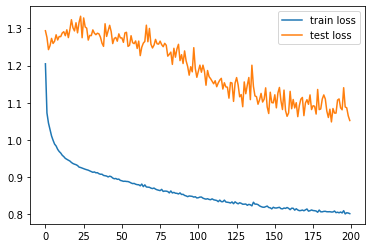

In [434]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

overfitting?Does not look like typical overfitting although test loss keeps decreasing the gap between the train loss and test loss still greater than the expected generalization gap

In [435]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [436]:
#Get model predictions
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

# Model was scaled earlier so scaling must be inverted
Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

In [437]:
# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

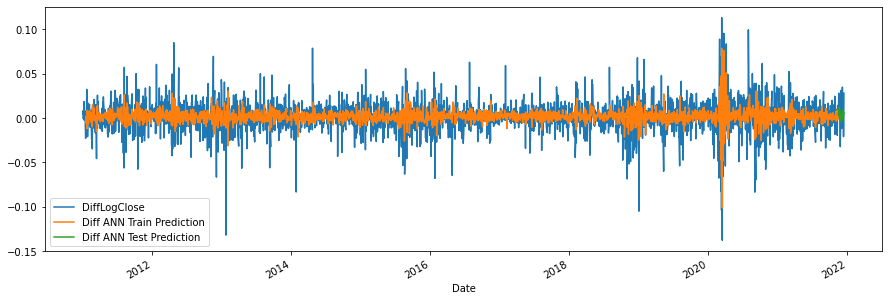

In [438]:
cols = ['DiffLogClose',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

In [439]:
# Needed to compute un-differenced predictions
df['ShiftLogClose'] = df['LogClose'].shift(1)
prev = df['ShiftLogClose']

In [440]:
# Last-known train value
last_train = train.iloc[-1]['LogClose']

In [441]:
# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

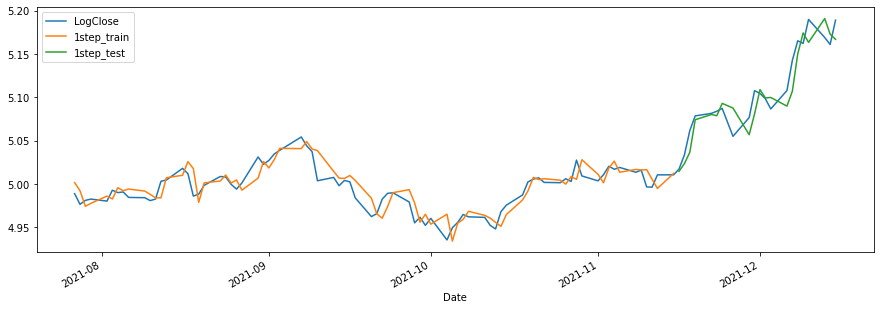

In [442]:
# plot 1-step forecast
df.iloc[-100:][['LogClose', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [443]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [444]:
# unscale
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1, 1)).flatten() # reshaping to 2-d, required for sci-kit learn, and then flatten to 1d array

In [445]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

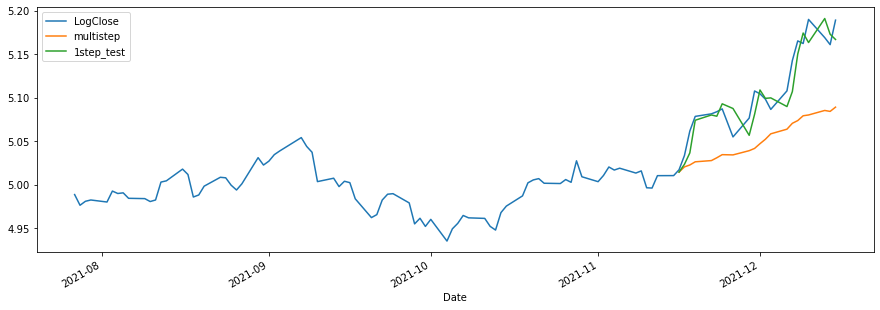

In [446]:
# plot 1-step and multi-step forecast
df.iloc[-100:][['LogClose', 'multistep', '1step_test']].plot(figsize=(15, 5));

In [447]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2727, 10) Y.shape (2727, 21)


In [448]:
# Split into train and test
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [449]:
# Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

In [450]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [451]:
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=100,
  validation_data=(Xtest_m, Ytest_m)
)

Epoch 1/100
86/86 [==============================] - 0s 2ms/step - loss: 1.1371 - val_loss: 1.2254
Epoch 2/100
86/86 [==============================] - 0s 846us/step - loss: 1.0594 - val_loss: 1.2306
Epoch 3/100
86/86 [==============================] - 0s 875us/step - loss: 1.0333 - val_loss: 1.2335
Epoch 4/100
86/86 [==============================] - 0s 898us/step - loss: 1.0206 - val_loss: 1.2371
Epoch 5/100
86/86 [==============================] - 0s 898us/step - loss: 1.0120 - val_loss: 1.2323
Epoch 6/100
86/86 [==============================] - 0s 871us/step - loss: 1.0067 - val_loss: 1.2314
Epoch 7/100
86/86 [==============================] - 0s 894us/step - loss: 1.0027 - val_loss: 1.2352
Epoch 8/100
86/86 [==============================] - 0s 875us/step - loss: 0.9998 - val_loss: 1.2368
Epoch 9/100
86/86 [==============================] - 0s 880us/step - loss: 0.9973 - val_loss: 1.2353
Epoch 10/100
86/86 [==============================] - 0s 893us/step - loss: 0.9954 - val_loss

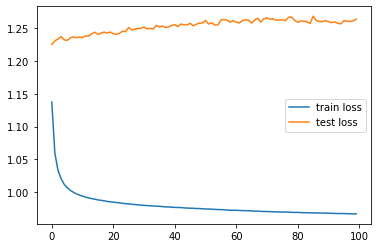

In [452]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

Overfitting

In [453]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [454]:
Ptrain.shape, Ptest.shape

((2726, 21), (21, 21))

In [455]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [464]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'multioutput'] = last_train

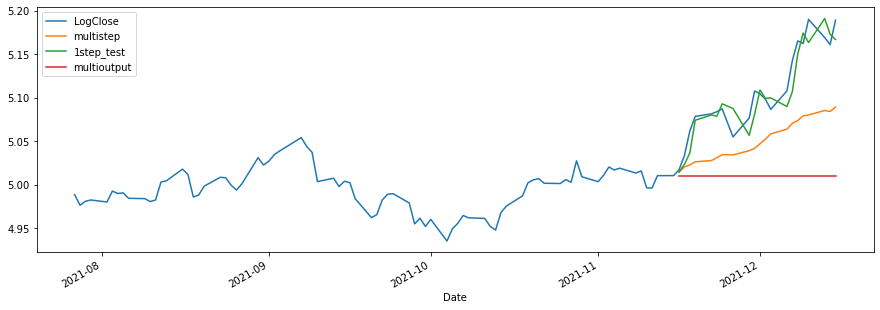

In [465]:
# plot all forecasts
cols = ['LogClose', 'multistep', '1step_test', 'multioutput']
df.iloc[-100:][cols].plot(figsize=(15, 5));

In [466]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose']
mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.010964644407123362
multi-output MAPE: 0.01889899514639549


# 1 Step Binary Classification

In [467]:
Ytrain_b = (Ytrain > 0) * 1
Ytest_b = (Ytest > 0) * 1

In [468]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [473]:
model.compile(
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # Import Binary
  optimizer='adam',
  metrics=['accuracy'],
)

In [474]:
# Call model fit with new targets
r = model.fit(
  Xtrain,
  Ytrain_b,
  epochs=100,
  validation_data=(Xtest, Ytest_b)
)

Epoch 1/100
86/86 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.5704 - val_loss: 0.7072 - val_accuracy: 0.3810
Epoch 2/100
86/86 [==============================] - 0s 947us/step - loss: 0.6479 - accuracy: 0.5565 - val_loss: 0.6945 - val_accuracy: 0.4286
Epoch 3/100
86/86 [==============================] - 0s 903us/step - loss: 0.6475 - accuracy: 0.5620 - val_loss: 0.6949 - val_accuracy: 0.4286
Epoch 4/100
86/86 [==============================] - 0s 924us/step - loss: 0.6475 - accuracy: 0.5620 - val_loss: 0.6961 - val_accuracy: 0.4286
Epoch 5/100
86/86 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.5660 - val_loss: 0.7014 - val_accuracy: 0.4286
Epoch 6/100
86/86 [==============================] - 0s 992us/step - loss: 0.6460 - accuracy: 0.5591 - val_loss: 0.6987 - val_accuracy: 0.4286
Epoch 7/100
86/86 [==============================] - 0s 922us/step - loss: 0.6470 - accuracy: 0.5649 - val_loss: 0.7037 - val_accuracy: 0.4286
Epo

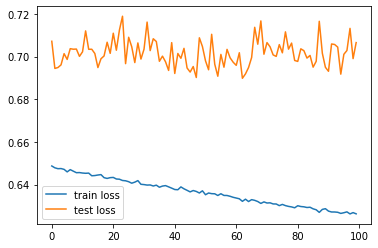

In [475]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

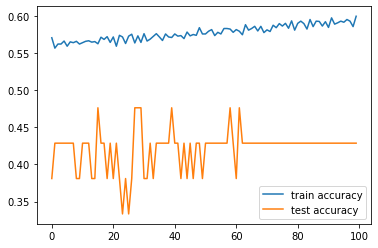

In [476]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend();